In [29]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [30]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<ipython-input-31-75decd45bede>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MEDV', data=boston_df, palette='winter')


<Axes: xlabel='MEDV'>

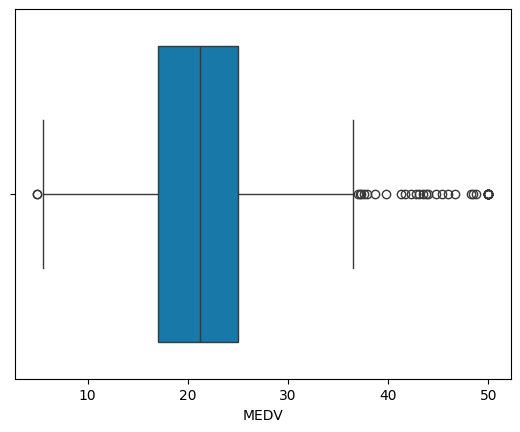

In [31]:
sns.boxplot(x='MEDV', data=boston_df, palette='winter')


<ipython-input-32-964bf8db8350>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='Set2')


<Axes: xlabel='CHAS', ylabel='count'>

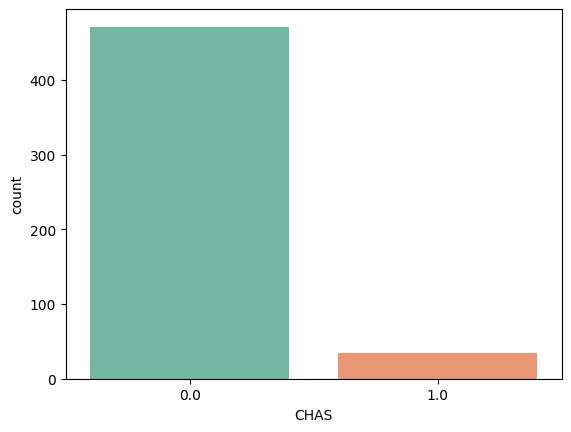

In [32]:
sns.countplot(x='CHAS', data=boston_df, palette='Set2')

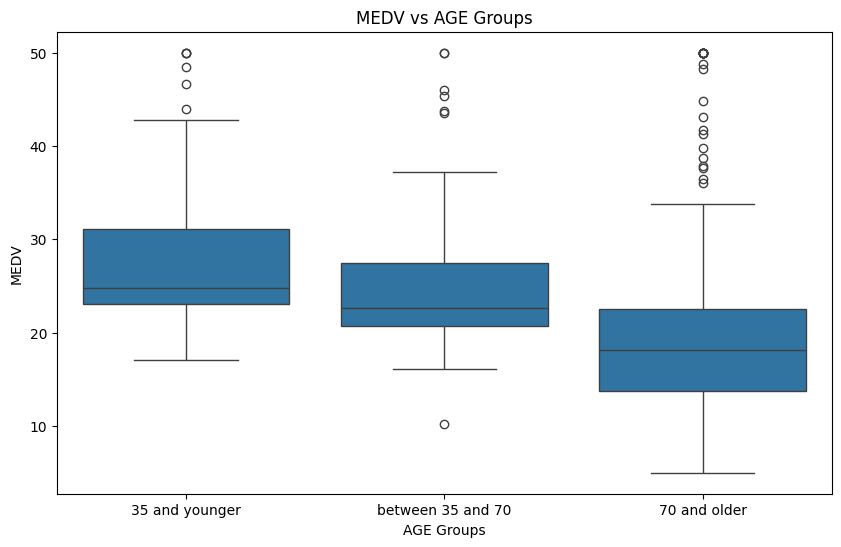

In [33]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', 'between 35 and 70', '70 and older']
boston_df['AGE_Group'] = pd.cut(
    boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE Groups')
plt.xlabel('AGE Groups')
plt.ylabel('MEDV')
plt.show()

<Axes: xlabel='NOX', ylabel='INDUS'>

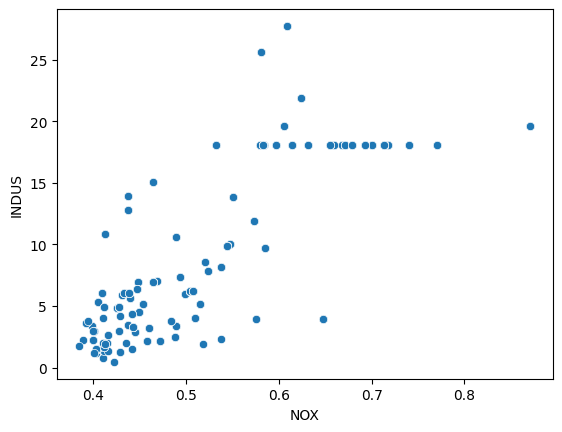

In [34]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)


<Axes: xlabel='PTRATIO', ylabel='Count'>

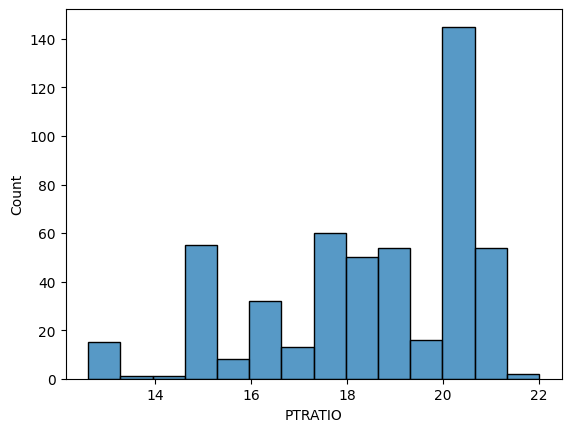

In [35]:
sns.histplot(x='PTRATIO', data=boston_df)


In [36]:
from scipy.stats import ttest_ind
chas = boston_df['CHAS']
chasdummies = pd.get_dummies(chas, dtype=int)
chasdummies
t_statistic, p_value = ttest_ind(chasdummies[1], chasdummies[0])
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


T-statistic: -53.96009489490948
P-value: 8.757522855106094e-300
Reject the null hypothesis: There is a significant difference between the groups.


In [37]:
f_statistic, p_value = stats.f_oneway(boston_df['MEDV'], boston_df['AGE'])

print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

F-statistic: 1223.1740271875933
P-value: 3.20946197250671e-176
Reject the null hypothesis: There is a significant difference between the groups.


In [38]:
correlation_coef, p_value = stats.pearsonr(
    boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation Coefficient: {correlation_coef}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the variables.")

Pearson Correlation Coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98
Reject the null hypothesis: There is a significant correlation between the variables.


In [39]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 09 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        12:01:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""